In [63]:
options(stringsAsFactors = FALSE)
df <- read.csv(file="atussum_2013/atussum_2013.dat", header=TRUE, sep=",")

Replace time activity codes with meaningful neams.

In [64]:
Lex <- read.csv(file="lexiconwex2013.csv", header=TRUE, sep=",")

Lex=Lex[!is.na(Lex["X6.digit.activity.code"]),c(1,2)]

Lex$codes=sprintf("t%06i",Lex$X6.digit.activity.code)

for(i in 1:length(names(df))){
    if(sum(Lex$codes==names(df)[i])==1){
        names(df)[i] = gsub('([[:punct:]])|\\s+','_',Lex$Activity[Lex$codes==names(df)[i]])
        }
}

Sort activities according to mean.

In [65]:
mns <- colMeans(df[-(1:24)], na.rm=TRUE)

In [66]:
head(mns[order(mns,decreasing=TRUE)],n=20)

Sleeping 
                               527.265261 
    Television_and_movies__not_religious_ 
                               178.320597 
                           Work__main_job 
                               147.100132 
                      Eating_and_drinking 
                                67.398595 
Socializing_and_communicating_with_others 
                                41.980061 
   Washing__dressing_and_grooming_oneself 
                                41.694071 
              Food_and_drink_preparation_ 
                                29.041458 
                        Interior_cleaning 
                                24.553184 
            Reading_for_personal_interest 
                                21.550725 
                      Relaxing__thinking_ 
                                18.779007 
 Shopping__except_groceries__food_and_gas 
                                15.456653 
                Travel_related_to_working 
                                12.027317 
                            Playing_games 
                                11.727536 
                                  Laundry 
                                11.711375 
    Computer_use_for_leisure__exc__Games_ 
                                11.597716 
        Lawn__garden__and_houseplant_care 
                                11.544488 
          Insufficient_detail_in_verbatim 
                                10.353799 
            Physical_care_for_hh_children 
                                10.334651 
             Attending_religious_services 
                                 9.345718 
     Playing_with_hh_children__not_sports 
                                 8.027492

In [67]:
df <- df[c(1:24,24+order(mns,decreasing = TRUE))]

Produce log histograms for main activities

exp(3) ~ 20 min

exp(4) ~ 1 hour

exp(5) ~ 2.5 hours

exp(6) ~ 7 hours

In [68]:
library(purrr)
library(tidyr)
library(ggplot2)

multihist = function(x){
    log_x=log(x) 
    log_x=gather(log_x)# Convert to key-value pairs
    log_x$key_f = factor(log_x$key,names(x))
    ggplot(log_x,aes(value)) +                     # Plot the values
       facet_wrap(~ key_f, ncol=4, scales = "fixed", strip.position = "bottom") +   # In separate panels
       geom_histogram()
}

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 68934 rows containing non-finite values (stat_bin).”

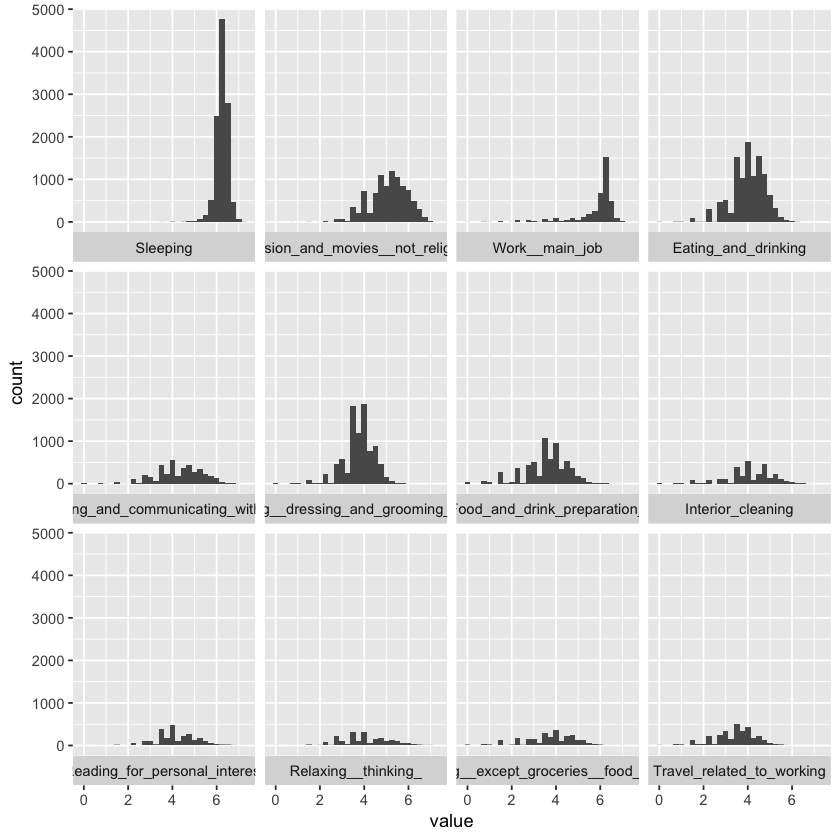

In [69]:
multihist(df[25:36])

In [70]:
names(df)

[1] "tucaseid"                                                                          
  [2] "TUFINLWGT"                                                                         
  [3] "TRYHHCHILD"                                                                        
  [4] "TEAGE"                                                                             
  [5] "TESEX"                                                                             
  [6] "PEEDUCA"                                                                           
  [7] "PTDTRACE"                                                                          
  [8] "PEHSPNON"                                                                          
  [9] "GTMETSTA"                                                                          
 [10] "TELFS"                                                                             
 [11] "TEMJOT"                                                                            
 [12] "TRDPFTPT"                                                                          
 [13] "TESCHENR"                                                                          
 [14] "TESCHLVL"                                                                          
 [15] "TRSPPRES"                                                                          
 [16] "TESPEMPNOT"                                                                        
 [17] "TRERNWA"                                                                           
 [18] "TRCHILDNUM"                                                                        
 [19] "TRSPFTPT"                                                                          
 [20] "TEHRUSLT"                                                                          
 [21] "TUDIARYDAY"                                                                        
 [22] "TRHOLIDAY"                                                                         
 [23] "TRTEC"                                                                             
 [24] "TRTHH"                                                                             
 [25] "Sleeping"                                                                          
 [26] "Television_and_movies__not_religious_"                                             
 [27] "Work__main_job"                                                                    
 [28] "Eating_and_drinking"                                                               
 [29] "Socializing_and_communicating_with_others"                                         
 [30] "Washing__dressing_and_grooming_oneself"                                            
 [31] "Food_and_drink_preparation_"                                                       
 [32] "Interior_cleaning"                                                                 
 [33] "Reading_for_personal_interest"                                                     
 [34] "Relaxing__thinking_"                                                               
 [35] "Shopping__except_groceries__food_and_gas"                                          
 [36] "Travel_related_to_working"                                                         
 [37] "Playing_games"                                                                     
 [38] "Laundry"                                                                           
 [39] "Computer_use_for_leisure__exc__Games_"                                             
 [40] "Lawn__garden__and_houseplant_care"                                                 
 [41] "Insufficient_detail_in_verbatim"                                                   
 [42] "Physical_care_for_hh_children"                                                     
 [43] "Attending_religious_services"                                                      
 [44] "Playing_with_hh_children__not_sports"                                             

Other variables in the activity summary data:

* TRYHHCHILD - age of youngest child
* TEAGE - respondent age
* TESEX - sex 1 for male and 2 for female
* PEEDUCA - highest level of school
* PTDTRACE - race
* PEHSPNON - hispanic
* GTMETSTA - metropolitan status
* TELFS - labor force status
* TEMJOT - in the last seven days did you have more than one job?
* TESCHENR - school enrollment
* TRSPPRES - presence of the respondent's spouse or unmarried partner in the household
* TESPEMPNOT - employment status of spouse or unmarried partner
* TRERNWA - Weekly earnings at main job
* TRCHILDNUM - Number of household children
* TRSPFTPT - Full time or part time employment status of spouse or unmarried partner
* TEHRUSLT - total hours usually worked per week
* TUDIARYDAY - Day of the week of diary day
* TRHOLIDAY - Flag to indicate if diary day was a holiday
* TRTEC - Total time spent providing eldercare
* TRTHH - Total time spent during diary day providing secondary childcare for household children

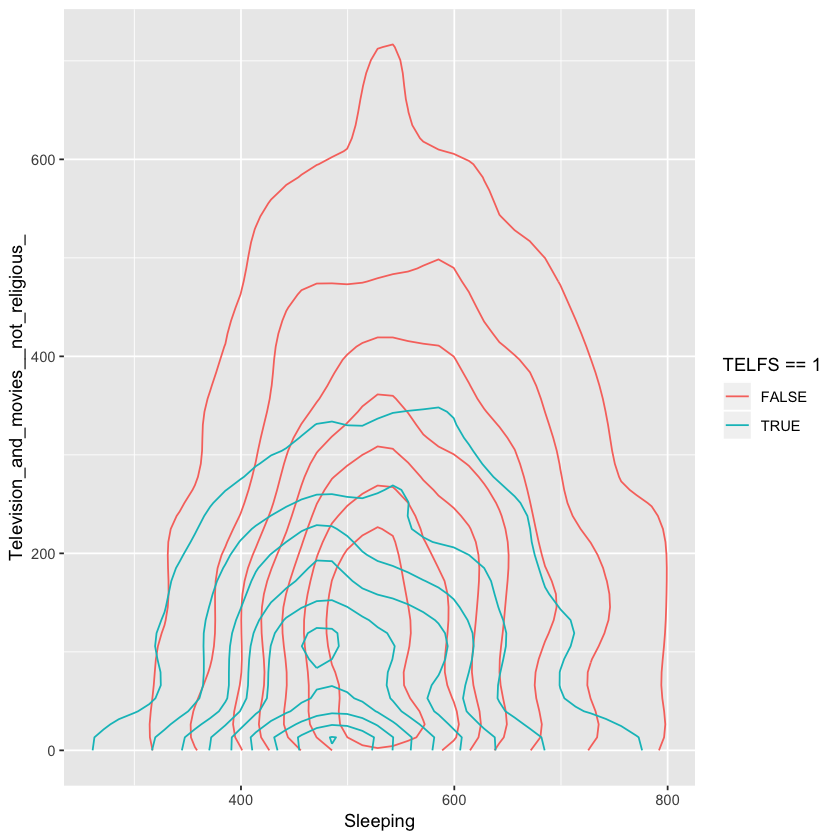

In [71]:
ggplot(data = df) + 
  geom_density2d(mapping = aes(x = Sleeping, y =Television_and_movies__not_religious_, color=TELFS==1)) 


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


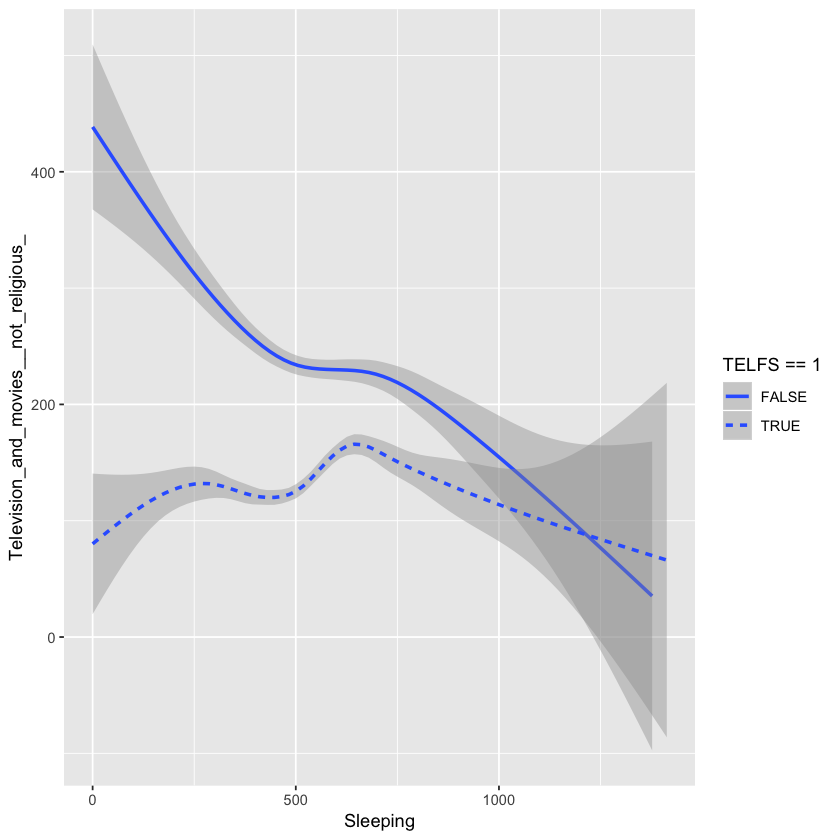

In [72]:
ggplot(data = df) + 
  geom_smooth(mapping = aes(x = Sleeping, y = Television_and_movies__not_religious_, linetype=TELFS==1)) 

Read well-being data

In [73]:
df2 <- read.csv(file="wbresp_2013/wbresp_2013.dat", header=TRUE, sep=",")

In [75]:
str(df2)

'data.frame':	10378 obs. of  16 variables:
 $ TUCASEID : num  2.01e+13 2.01e+13 2.01e+13 2.01e+13 2.01e+13 ...
 $ TULINENO : int  1 1 1 1 1 1 1 1 1 1 ...
 $ WECANTRIL: int  8 7 10 10 8 9 8 10 10 9 ...
 $ WEGENHTH : int  2 3 4 2 3 2 3 3 5 1 ...
 $ WEHBP    : int  2 2 2 2 1 2 1 2 1 2 ...
 $ WEPAINMD : int  2 2 2 2 1 2 1 2 1 2 ...
 $ WEREST   : int  2 3 1 1 1 1 4 1 4 3 ...
 $ WETYPICAL: int  2 2 2 2 1 2 2 2 3 2 ...
 $ WRTELIG  : int  880 824 900 960 870 915 1082 735 435 840 ...
 $ WUFINLWGT: num  11665486 5154131 11573515 9040745 6343734 ...
 $ WXCANTRIL: int  0 0 0 0 0 0 0 0 0 0 ...
 $ WXGENHTH : int  0 0 0 0 0 0 0 0 0 0 ...
 $ WXHBP    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ WXPAINMD : int  0 0 0 0 0 0 0 0 0 0 ...
 $ WXREST   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ WXTYPICAL: int  0 0 0 0 0 0 0 0 0 0 ...
